loss: 17769.243861617182
loss: 16240.555001159815
loss: 15003.460406869428
loss: 14000.23622352035
loss: 13184.052807502494
loss: 12517.367571589237
loss: 11970.27904246775
loss: 11519.054411463736
loss: 11144.894452281473
loss: 10832.913157314146
loss: 10571.297410822153
loss: 10350.658520573998
loss: 10163.5011701279
loss: 10003.82517478931
loss: 9866.804576742228
loss: 9748.541503139651
loss: 9645.874252649017
loss: 9556.225505115985
loss: 9477.484906749349
loss: 9407.916432198215
loss: 9346.085366665571
loss: 9290.800531705985
loss: 9241.06839066041
loss: 9196.056441797271
loss: 9155.063897906057
loss: 9117.498102904861
loss: 9082.85548193316
loss: 9050.706077112985
loss: 9020.681022555098
loss: 8992.462115035725
loss: 8965.773468409923
loss: 8940.37446716765
loss: 8916.053977920275
loss: 8892.625514706835
loss: 8869.9231870669
loss: 8847.798284131713
loss: 8826.116376850325
loss: 8804.754841643153
loss: 8783.600727106299
loss: 8762.548899099344
loss: 8741.500410435809
loss: 8720.3

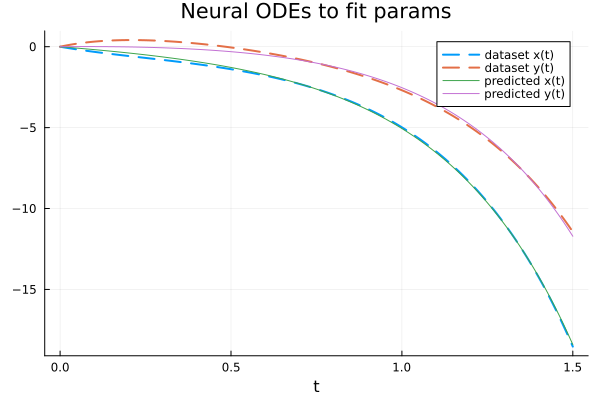

In [4]:
using Flux, DiffEqFlux, DifferentialEquations, Plots

function parametric_ode_system!(du,u,p,t)
  x, y = u
  a1, b1, c1, d1, a2, b2, c2, d2 = p
  du[1] = dx = a1*x + b1*y + c1*exp(-d1*t)
  du[2] = dy = a2*x + b2*y + c2*exp(-d2*t)
end

true_params = [1.11, 2.43, -3.66, 1.37, 2.89, -1.97, 4.58, 2.86]

#what the analytic solutioj used for?
an_sol_x(t) =
  -1.38778e-17 * exp(-8.99002 * t) -
  2.77556e-17 * exp(-7.50002 * t) +
  3.28757 * exp(-3.49501 * t) -
  3.18949 * exp(-2.86 * t) +
  0.258028 * exp(-1.37 * t) -
  0.356108 * exp(2.63501 * t) +
  4.44089e-16 * exp(3.27002 * t) +
  1.11022e-16 * exp(4.76002 * t)
an_sol_y(t) =
  -6.23016 * exp(-3.49501 * t) +
  5.21081 * exp(-2.86 * t) +
  1.24284 * exp(-1.37 * t) -
  0.223485 * exp(2.63501 * t) +
  2.77556e-17 * exp(4.76002 * t)

#set
# The settings are:
# Input: t∈[0,1.5]
#  discretization step 0.01
# Boundary conditions: x(0)=0;y(0)=0
# Initial values of any parameters; for convenience we set them all equal to 1
tbegin=0.0
tend=1.5
tstep=0.01
trange = tbegin:tstep:tend
u0 = [0.0,0.0]
tspan = (tbegin,tend)
p = ones(8)


prob = ODEProblem(parametric_ode_system!, u0, tspan, p)

function net()
    solve(prob, Tsit5(), p=p, saveat=trange)
end

dataset_outs = [an_sol_x.(trange), an_sol_y.(trange)]

function loss_func()
  pred = net()
  sum(abs2, dataset_outs[1] .- pred[1,:]) +
  sum(abs2, dataset_outs[2] .- pred[2,:])
end

epochs = 1000
learning_rate = 0.05
data = Iterators.repeated((), epochs)
opt = ADAM(learning_rate)
callback_func = function ()
  println("loss: ", loss_func())
end

fparams = Flux.params(p)
Flux.train!(loss_func, fparams, data, opt, cb=callback_func)

predict_prob = ODEProblem(parametric_ode_system!, u0, tspan, p)
predict_sol = solve(prob, Tsit5(), saveat=trange)
x_predict_sol = [u[1] for u in predict_sol.u]
y_predict_sol = [u[2] for u in predict_sol.u]

println("Learned parameters:", p)

plot(trange, dataset_outs[1],
    linewidth=2, ls=:dash,
    title="Neural ODEs to fit params",
    xaxis="t",
    label="dataset x(t)",
    legend=true)
plot!(trange, dataset_outs[2],
    linewidth=2, ls=:dash,
    label="dataset y(t)")
plot!(predict_sol.t, x_predict_sol,
    linewidth=1,
    label="predicted x(t)")
plot!(predict_sol.t, y_predict_sol,
    linewidth=1,
    label="predicted y(t)")

In [3]:
type(parametric_ode_system!)
type(u0)
type(tspan), 
type(p)

LoadError: UndefVarError: `type` not defined